## Observations and Insights 

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [43]:
# Checking the number of mice.
len(combined_data["Mouse ID"].unique())

249

In [18]:
duplicate_mouse= combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [9]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data_mice = combined_data.set_index('Mouse ID')
mouse = duplicate_data_mice.loc['g989', :]

In [17]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse.head()


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_mice = duplicate_data_mice.drop(index = 'g989')
new_clean_data = clean_data_mice.reset_index()
new_clean_data["Mouse ID"].nunique()

248

In [13]:
# Checking the number of mice in the clean DataFrame.
new_clean_data["Mouse ID"].value_counts().head()

q787    10
o795    10
a251    10
b879    10
y865    10
Name: Mouse ID, dtype: int64

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = new_clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = new_clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = new_clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = new_clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = new_clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, "SEM": sem})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_agg = new_clean_data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_agg
# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [24]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
unique_mice_bar = new_clean_data.groupby('Drug Regimen')['Mouse ID'].nunique()
unique_mice_bar


Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

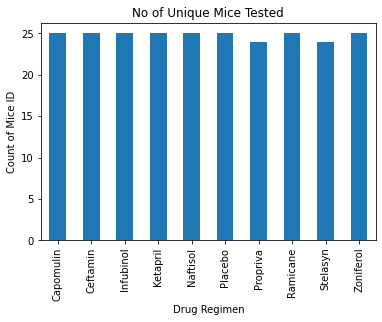

In [60]:
mice_bar= unique_mice_bar.plot(kind='bar', title="No of Unique Mice Tested")

mice_bar.set_ylabel("Count of Mice ID")
plt.savefig("../Images/bar_pandas.png")

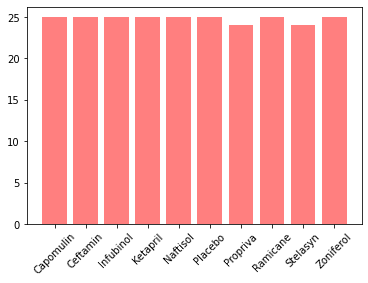

<Figure size 432x288 with 0 Axes>

In [61]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = unique_mice_bar.index.values 

y_axis = unique_mice_bar.values

plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
plt.xticks(rotation=45)
plt.show()
plt.savefig("../Images/bar_plot.png")

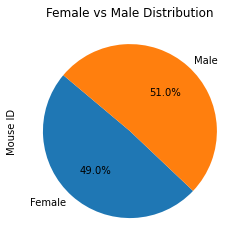

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_df = new_clean_data.groupby("Sex").count()['Mouse ID']
labels = new_clean_data['Sex'].unique()
mice_pie = pie_df.plot(kind='pie', title='Female vs Male Distribution', y='Sex',
                       autopct="%1.1f%%", shadow=False, startangle=140)

plt.savefig("../Images/pie_pandas.png")

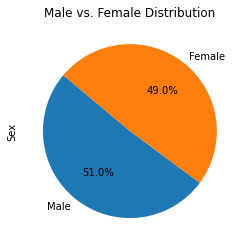

<Figure size 432x288 with 0 Axes>

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_plot = new_clean_data["Sex"].value_counts()
labels=pie_plot.index 
sizes=pie_plot.values
plt.pie(sizes, labels=labels, autopct="%1.1f%%", shadow=False, startangle=140)
plt.title("Male vs. Female Distribution")
plt.ylabel("Sex")

plt.show()
plt.tight_layout()
plt.savefig("../Images/pie_plot.png")

## Quartiles, Outliers and Boxplots

In [52]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_greatest = new_clean_data[new_clean_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
tumor_greatest = tumor_greatest.sort_values(["Timepoint"], ascending=False)
tumor_greatest
merged_df = tumor_greatest[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
merged_df.head()

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
1859,Infubinol,z581,45,62.754451
800,Infubinol,e476,45,62.435404
154,Ramicane,c758,45,33.397653
440,Capomulin,i557,45,47.685963
144,Capomulin,m957,45,33.329098


In [53]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
   # Locate the rows which contain mice on each drug and get the tumor volumes
     # add subset 
     # Determine outliers using upper and lower bounds
capomulin= merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane= merged_df.loc[merged_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol=merged_df.loc[merged_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin= merged_df.loc[merged_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']    

#Capomulin
quartile_cap= capomulin.quantile([.25,.5,.75])
lower_cap= quartile_cap[.25]
upper_cap=quartile_cap[.75]
iqr_cap= upper_cap-lower_cap
lowout_cap= lower_cap-(1.5*iqr_cap)
upout_cap= upper_cap+(1.5*iqr_cap)

#Ramicane
quartile_ram= ramicane.quantile([.25,.5,.75])
lower_ram= quartile_ram[.25]
upper_ram=quartile_ram[.75]
iqr_ram= upper_ram-lower_ram
lowout_ram= lower_ram-(1.5*iqr_ram)
upout_ram= upper_ram+(1.5*iqr_ram)

#Infubinol
quartile_inbol= infubinol.quantile([.25,.5,.75])
lower_inbol= quartile_inbol[.25]
upper_inbol=quartile_inbol[.75]
iqr_inbol= upper_inbol-lower_inbol
lowout_inbol= lower_inbol-(1.5*iqr_inbol)
upout_inbol= upper_inbol+(1.5*iqr_inbol)

#Ceftamin
quartile_ceft= ceftamin.quantile([.25,.5,.75])
lower_ceft= quartile_ceft[.25]
upper_ceft=quartile_ceft[.75]
iqr_ceft= upper_ceft-lower_ceft
lowout_ceft= lower_ceft-(1.5*iqr_ceft)
upout_ceft= upper_ceft+(1.5*iqr_ceft)

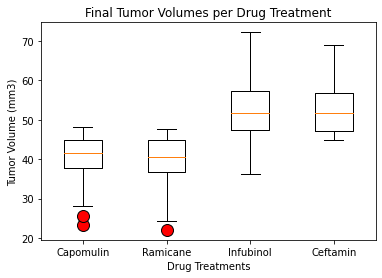

In [54]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxedplot = dict(markerfacecolor='red',markersize=12)
plt.boxplot([capomulin,ramicane, infubinol, ceftamin], labels=["Capomulin","Ramicane","Infubinol","Ceftamin"], flierprops= boxedplot)
plt.title("Final Tumor Volumes per Drug Treatment")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Treatments")
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume vs. Time Point for Mouse B742 treated with Capomulin')

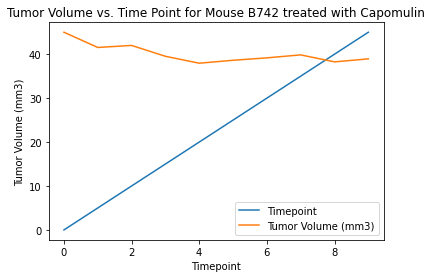

In [56]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_capomulin = new_clean_data[new_clean_data["Mouse ID"].isin(["b742"])]
mouse_capomulin

time_tumor_data = mouse_capomulin[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_tumor_data

timetumor_df = time_tumor_data.reset_index()
timetumor_df

timetumor_lineplot_df = timetumor_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
timetumor_lineplot_df

timetumor_lineplot_df.plot.line()

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs. Time Point for Mouse B742 treated with Capomulin")

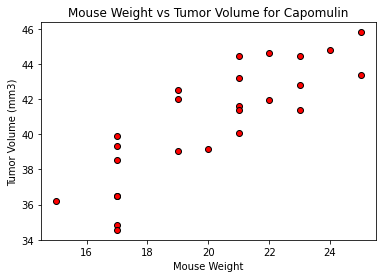

In [58]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
captabs= new_clean_data.loc[new_clean_data['Drug Regimen'] == 'Capomulin']
capmean=captabs.groupby(["Mouse ID"]).mean()
plt.scatter(capmean["Weight (g)"],capmean["Tumor Volume (mm3)"],facecolors="red", edgecolors="black")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight vs Tumor Volume for Capomulin")
plt.show()

## Correlation and Regression

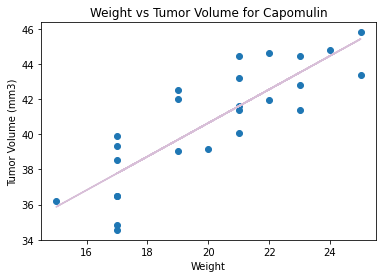

<Figure size 432x288 with 0 Axes>

In [59]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress

(slope, intercept,rvalue, pvalue, stderr)= linregress(capmean["Weight (g)"],capmean["Tumor Volume (mm3)"])
regress_values=capmean["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(capmean["Weight (g)"],capmean["Tumor Volume (mm3)"] )
plt.plot(capmean["Weight (g)"], regress_values, color='thistle')
plt.xlabel("Weight")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()

plt.savefig("../Images/regression.png")